# Mapping the Public Conversations on Education Using Topic Modelling: Organisational Salience and Attention, 2023–2025

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import entropy

from wordcloud import WordCloud

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("/workspaces/AM1_topic_modelling/data/full_retro/retro_topics_analysis_ready.csv")

# Saving Figures

In [3]:
from pathlib import Path

# Output directory for figures
FIG_DIR = Path("/workspaces/AM1_topic_modelling/visualisations")
FIG_DIR.mkdir(parents=True, exist_ok=True)

print(f"Figures will be saved to: {FIG_DIR}")

Figures will be saved to: /workspaces/AM1_topic_modelling/visualisations


In [4]:
def save_fig(
    filename,
    dpi=300,
    tight=True,
    facecolor="white"
):
    """
    Save the current matplotlib figure to the visualisations folder.
    """
    if tight:
        plt.tight_layout()
    plt.savefig(
        FIG_DIR / filename,
        dpi=dpi,
        bbox_inches="tight",
        facecolor=facecolor
    )
    print(f"Saved: {filename}")

# Explore 

In [5]:
df.head()

,url,date,year,month,source,type,text_clean,topic_num,topic_name,dominant_topic_weight,...,mental_health,safeguarding,teacher_recruitment,accountability_reform,curriculum_policy,attendance_hubs,disadvantage_and_attainment_gaps,free_school_meals,school_places,exclusions
0,https://epi.org.uk/publications-and-research/w...,2025-12-11,2025,12,epi,think_tank,early education and care and the private secto...,0,child_and_family_support,0.025999,...,0.00000,0.023686,0.007512,0.000079,0.0,0.000000,0.014102,0.002116,0.012337,0.004506
1,https://epi.org.uk/publications-and-research/e...,2025-12-04,2025,12,epi,think_tank,edtech decision making and inclusive practice ...,18,ai_and_edtech,0.109272,...,0.00307,0.000000,0.012510,0.030622,0.0,0.011429,0.019019,0.000000,0.000000,0.000000
2,https://epi.org.uk/publications-and-research/w...,2025-11-20,2025,11,epi,think_tank,what you learn and what you earn educational c...,19,post_16_education,0.147079,...,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.048886,0.000000,0.000000,0.000000
3,https://epi.org.uk/publications-and-research/a...,2025-11-12,2025,11,epi,think_tank,a decade of degree apprenticeships ten years o...,10,apprenticeships,0.167710,...,0.00201,0.000000,0.000375,0.000849,0.0,0.000000,0.017427,0.001038,0.000000,0.000000
4,https://epi.org.uk/publications-and-research/y...,2025-11-12,2025,11,epi,think_tank,youth degree apprenticeships an alternative to...,10,apprenticeships,0.136422,...,0.00000,0.000000,0.002166,0.000385,0.0,0.000000,0.005540,0.000000,0.000000,0.002097


In [6]:
df.columns

Index(['url', 'date', 'year', 'month', 'source', 'type', 'text_clean',
       'topic_num', 'topic_name', 'dominant_topic_weight',
       'child_and_family_support', 'academy_finance_and_oversight',
       'mat_governance', 'teacher_pay', 'ofsted_inspections',
       'academic_attainment', 'pupil_absence', 'dfe_intervention',
       'send_provision', 'teacher_strikes', 'apprenticeships',
       'exam_regulation', 'raac_crisis', 'examinations_and_assessment',
       'school_funding', 'education_politics', 'education_research',
       'leadership_appointments', 'ai_and_edtech', 'post_16_education',
       'mental_health', 'safeguarding', 'teacher_recruitment',
       'accountability_reform', 'curriculum_policy', 'attendance_hubs',
       'disadvantage_and_attainment_gaps', 'free_school_meals',
       'school_places', 'exclusions'],
      dtype='object')

In [7]:
df.topic_name.value_counts()

topic_name
mat_governance                      263
teacher_recruitment                 241
ofsted_inspections                  236
safeguarding                        218
disadvantage_and_attainment_gaps    212
post_16_education                   168
education_politics                  167
send_provision                      160
education_research                  158
academy_finance_and_oversight       154
school_funding                      146
teacher_strikes                     134
exam_regulation                     124
raac_crisis                         122
curriculum_policy                   121
leadership_appointments             119
accountability_reform               115
teacher_pay                         111
apprenticeships                     108
school_places                       105
mental_health                       100
ai_and_edtech                        98
free_school_meals                    98
examinations_and_assessment          88
dfe_intervention             

In [8]:
TOPIC_COLS = {
    0: "child_and_family_support",
    1: "academy_finance_and_oversight",
    2: "mat_governance",
    3: "teacher_pay",
    4: "ofsted_inspections",
    5: "academic_attainment",
    6: "pupil_absence",
    7: "dfe_intervention",
    8: "send_provision",
    9: "teacher_strikes",
    10: "apprenticeships",
    11: "exam_regulation",
    12: "raac_crisis",
    13: "examinations_and_assessment",
    14: "school_funding",
    15: "education_politics",
    16: "education_research",
    17: "leadership_appointments",
    18: "ai_and_edtech",
    19: "post_16_education",
    20: "mental_health",
    21: "safeguarding",
    22: "teacher_recruitment",
    23: "accountability_reform",
    24: "curriculum_policy",
    25: "attendance_hubs",
    26: "disadvantage_and_attainment_gaps",
    27: "free_school_meals",
    28: "school_places",
    29: "exclusions"
}

# Check missing values 

In [9]:
df.isna().sum()

url                                 0
date                                0
year                                0
month                               0
source                              0
type                                0
text_clean                          0
topic_num                           0
topic_name                          0
dominant_topic_weight               0
child_and_family_support            0
academy_finance_and_oversight       0
mat_governance                      0
teacher_pay                         0
ofsted_inspections                  0
academic_attainment                 0
pupil_absence                       0
dfe_intervention                    0
send_provision                      0
teacher_strikes                     0
apprenticeships                     0
exam_regulation                     0
raac_crisis                         0
examinations_and_assessment         0
school_funding                      0
education_politics                  0
education_re

# Create a datetime columns - year_month 

In [10]:
df['year_month'] = pd.to_datetime(
    df['year'].astype(str) + '-' + df['month'].astype(str) + '-01'
)

In [11]:
df.head()

,url,date,year,month,source,type,text_clean,topic_num,topic_name,dominant_topic_weight,...,safeguarding,teacher_recruitment,accountability_reform,curriculum_policy,attendance_hubs,disadvantage_and_attainment_gaps,free_school_meals,school_places,exclusions,year_month
0,https://epi.org.uk/publications-and-research/w...,2025-12-11,2025,12,epi,think_tank,early education and care and the private secto...,0,child_and_family_support,0.025999,...,0.023686,0.007512,0.000079,0.0,0.000000,0.014102,0.002116,0.012337,0.004506,2025-12-01
1,https://epi.org.uk/publications-and-research/e...,2025-12-04,2025,12,epi,think_tank,edtech decision making and inclusive practice ...,18,ai_and_edtech,0.109272,...,0.000000,0.012510,0.030622,0.0,0.011429,0.019019,0.000000,0.000000,0.000000,2025-12-01
2,https://epi.org.uk/publications-and-research/w...,2025-11-20,2025,11,epi,think_tank,what you learn and what you earn educational c...,19,post_16_education,0.147079,...,0.000000,0.000000,0.000000,0.0,0.000000,0.048886,0.000000,0.000000,0.000000,2025-11-01
3,https://epi.org.uk/publications-and-research/a...,2025-11-12,2025,11,epi,think_tank,a decade of degree apprenticeships ten years o...,10,apprenticeships,0.167710,...,0.000000,0.000375,0.000849,0.0,0.000000,0.017427,0.001038,0.000000,0.000000,2025-11-01
4,https://epi.org.uk/publications-and-research/y...,2025-11-12,2025,11,epi,think_tank,youth degree apprenticeships an alternative to...,10,apprenticeships,0.136422,...,0.000000,0.002166,0.000385,0.0,0.000000,0.005540,0.000000,0.000000,0.002097,2025-11-01


# topic distribution

In [12]:
topic_dist = (
    df['topic_name']
    .value_counts(normalize=True)
    .reset_index()
    .rename(columns={'index': 'topic', 'topic_name': 'share'})
)

topic_dist

,share,proportion
0,mat_governance,0.066213
1,teacher_recruitment,0.060675
2,ofsted_inspections,0.059416
3,safeguarding,0.054884
4,disadvantage_and_attainment_gaps,0.053374
5,post_16_education,0.042296
6,education_politics,0.042044
7,send_provision,0.040282
8,education_research,0.039778
9,academy_finance_and_oversight,0.038771


/tmp/ipykernel_11694/3818243450.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


Saved: topic_distribution_full_corpus.png


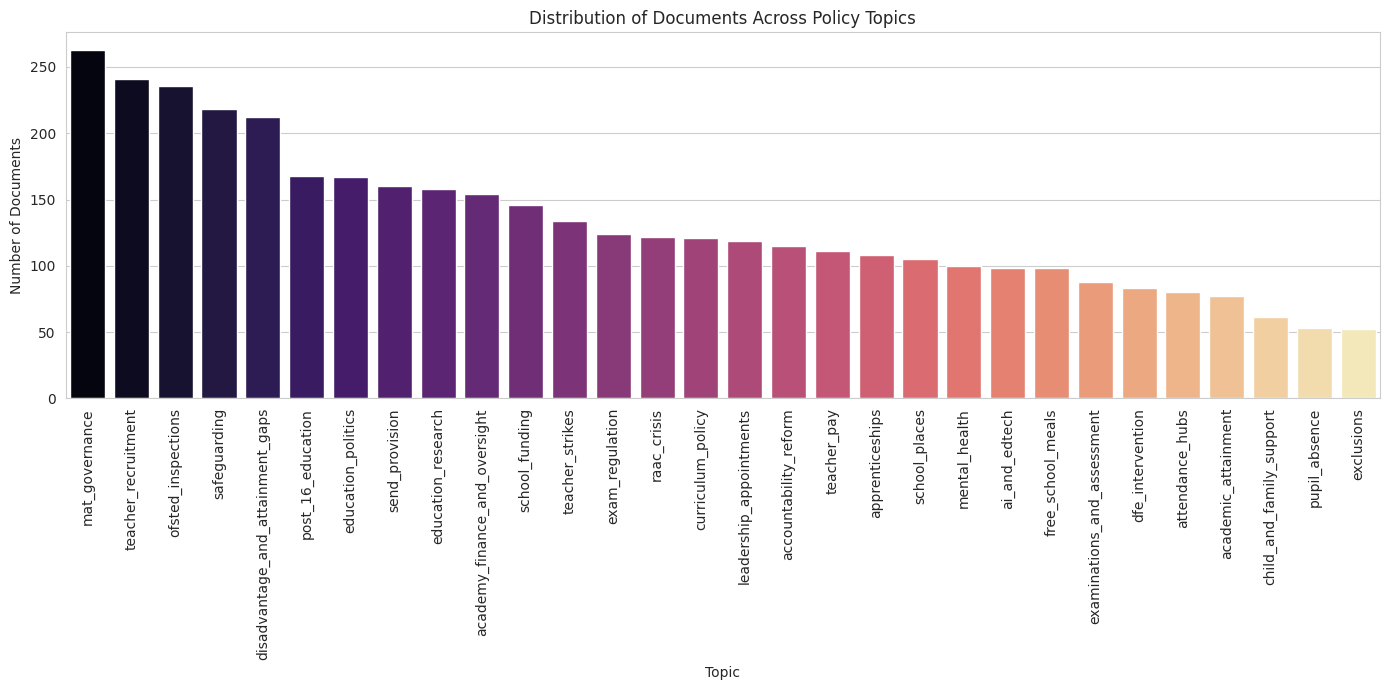

In [13]:
# Topic Distribution across corpus 
# Get topic order by frequency (descending)
topic_order = (
    df['topic_name']
    .value_counts()
    .index
)

plt.figure(figsize=(14, 7))
sns.countplot(
    x='topic_name',
    data=df,
    order=topic_order,
    palette='magma'
)

plt.xlabel("Topic")
plt.ylabel("Number of Documents")
plt.title("Distribution of Documents Across Policy Topics")
plt.xticks(rotation=90)
plt.tight_layout()

save_fig("topic_distribution_full_corpus.png")
plt.show()

/tmp/ipykernel_11694/2088457717.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Saved: top_10_topics.png


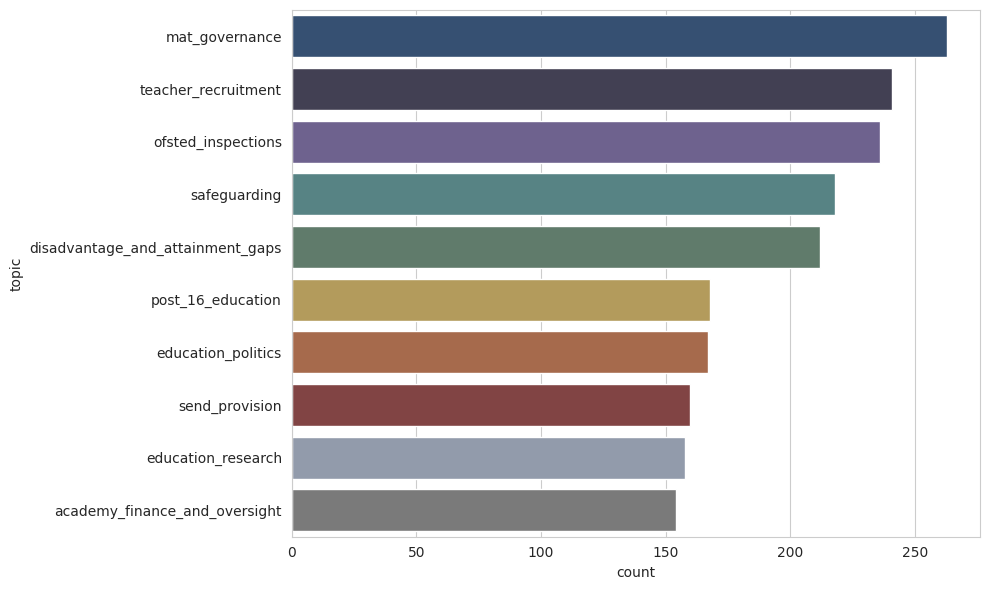

In [14]:
topic_counts = (
    df['topic_name']
    .value_counts()
    .head(10)
    .reset_index()
)

topic_counts.columns = ['topic', 'count']

palette = [
    "#7A7A7A",
    "#8E9AAF",
    "#8B3A3A",
    "#B5653D",
    "#C2A14D",
    "#5B7F6A",
    "#4F8A8B",
    "#6B5B95",
    "#3F3D56",
    "#2C4F7C"
]


# 👇 smallest → largest
topic_counts = topic_counts.sort_values('count', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=topic_counts,
    y="topic",
    x="count",
    palette=palette
)

plt.gca().invert_yaxis()   # 👈 THIS puts largest at the top

save_fig("top_10_topics.png")
plt.show()


# Top 10 topics per source

In [15]:
sources = df['source'].unique()

for org in sources:
    print(f"\n=== {org} ===")

    top_topics = (
        df[df['source'] == org]['topic_name']
        .value_counts()
        .head(10)
        .reset_index()
    )
    top_topics.columns = ['topic', 'count']

    display(top_topics)


=== epi ===


,topic,count
0,education_research,20
1,disadvantage_and_attainment_gaps,16
2,post_16_education,15
3,mental_health,6
4,academic_attainment,6
5,teacher_recruitment,6
6,accountability_reform,5
7,pupil_absence,5
8,examinations_and_assessment,5
9,free_school_meals,5



=== fed ===


,topic,count
0,leadership_appointments,21
1,education_research,16
2,ai_and_edtech,14
3,curriculum_policy,9
4,accountability_reform,8
5,apprenticeships,8
6,post_16_education,6
7,free_school_meals,5
8,teacher_recruitment,3
9,child_and_family_support,3



=== fft ===


,topic,count
0,disadvantage_and_attainment_gaps,70
1,pupil_absence,30
2,academic_attainment,25
3,examinations_and_assessment,20
4,exclusions,13
5,ofsted_inspections,12
6,post_16_education,6
7,curriculum_policy,4
8,mental_health,3
9,school_places,3



=== gov ===


,topic,count
0,academy_finance_and_oversight,152
1,dfe_intervention,80
2,apprenticeships,63
3,post_16_education,56
4,exam_regulation,53
5,ofsted_inspections,36
6,child_and_family_support,28
7,mat_governance,26
8,safeguarding,24
9,curriculum_policy,21



=== nuffield ===


,topic,count
0,education_research,94
1,child_and_family_support,2
2,teacher_recruitment,2
3,send_provision,2
4,free_school_meals,1
5,exclusions,1
6,accountability_reform,1
7,apprenticeships,1
8,mental_health,1
9,school_funding,1



=== schoolsweek ===


,topic,count
0,mat_governance,234
1,teacher_recruitment,211
2,safeguarding,192
3,ofsted_inspections,187
4,education_politics,163
5,send_provision,153
6,school_funding,134
7,teacher_strikes,128
8,disadvantage_and_attainment_gaps,124
9,teacher_pay,108


## Organisational Topic Profiles (Based on Top 10 Topics)

### Education Policy Institute (EPI)

The Education Policy Institute’s topic profile is led by **education research**, **disadvantage and attainment gaps**, and **post-16 education**, with secondary attention to mental health, attainment, assessment, and pupil absence. The spread across outcome-focused and structural topics indicates a **moderately broad focus**, centred on analysing educational inequality and performance rather than governance or system control.

- **Breadth:** medium  
- **Core focus:** research, inequality, outcomes, post-16 transitions  
- **One-sentence description:** EPI focuses on research-driven analysis of educational outcomes and inequalities, particularly across attainment and post-16 pathways.

---

### Foundation for Education Development (FED)

The Foundation for Education Development’s topic distribution is dominated by **leadership appointments**, alongside **education research** and **AI and EdTech**, with additional attention to curriculum policy, accountability reform, apprenticeships, and post-16 education. This combination points to a **selective but diverse system-level focus**, with relatively limited emphasis on pupil-level outcomes or disadvantage.

- **Breadth:** medium  
- **Core focus:** leadership, system direction, innovation, reform  
- **One-sentence description:** FED’s outputs concentrate on leadership, system reform, and future-oriented change, including technology and curriculum issues.

---

### FFT Education Datalab

FFT Education Datalab’s output is highly concentrated around **disadvantage and attainment gaps**, **pupil absence**, **academic attainment**, and **examinations and assessment**, with other topics appearing only marginally. This distribution indicates a **narrow and tightly focused agenda**, centred on analysing performance and inequality through attendance, attainment, and assessment.

- **Breadth:** narrow  
- **Core focus:** attainment, attendance, assessment, disadvantage  
- **One-sentence description:** FFT Education Datalab focuses on data-driven analysis of attainment, attendance, and educational inequality.

---

### UK Government (Gov / DfE)

Government outputs are dominated by **academy finance and oversight** and **DfE intervention**, alongside substantial attention to apprenticeships, post-16 education, exam regulation, inspection, safeguarding, and governance. Compared to other organisations, this reflects the **broadest thematic spread**, covering regulation, funding, and delivery across the system.

- **Breadth:** broad  
- **Core focus:** system oversight, regulation, implementation, governance  
- **One-sentence description:** Government publications span a wide range of governance, regulatory, and delivery issues across the education system.

---

### Nuffield Foundation

The Nuffield Foundation’s topic profile is overwhelmingly dominated by **education research**, with all other topics appearing only once or twice. This extreme concentration indicates a **very narrow thematic focus**, with minimal diversification beyond research-related content.

- **Breadth:** very narrow  
- **Core focus:** education research  
- **One-sentence description:** Nuffield’s outputs are almost entirely concentrated on education research, with little thematic spread beyond this.

---

### Schools Week

Schools Week’s topic distribution is wide but structured around **MAT governance**, **teacher recruitment**, **safeguarding**, and **Ofsted inspections**, alongside education politics, SEND provision, school funding, strikes, and pay. This pattern reflects a **broad but coherent focus** on governance, accountability, and workforce pressures.

- **Breadth:** broad  
- **Core focus:** governance, accountability, workforce, system pressures  
- **One-sentence description:** Schools Week focuses on governance, accountability, and workforce issues across the school system.

---

## Cross-organisational pattern (from topic spread alone)

- **Broadest focus:** UK Government; Schools Week  
- **Moderate breadth:** Education Policy Institute; Foundation for Education Development  
- **Narrow focus:** FFT Education Datalab  
- **Very narrow focus:** Nuffield Foundation


# Create timestamp 

In [16]:
#filter by year
df = df[df['year'] <= 2025].copy()

In [17]:
df['year_month'] = pd.to_datetime(
    df['year'].astype(str) + '-' + df['month'].astype(str) + '-01'
)

# Pre and post election cut-off 

In [18]:
cutoff = pd.Timestamp("2024-07-01")

df["period"] = np.where(
    df["year_month"] < cutoff,
    "pre_election",
    "post_election"
)

df["period"].value_counts()


period
pre_election     2052
post_election    1917
Name: count, dtype: int64

# Topics over time - pre and post election

In [19]:
# Monthly article counts for ALL topics
monthly_counts = (
    df
    .groupby(["year_month", "topic_name"])
    .size()
    .reset_index(name="n_articles")
)

In [20]:
monthly_counts["n_articles_smooth"] = (
    monthly_counts
    .groupby("topic_name")["n_articles"]
    .rolling(3, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)


In [21]:
top_n_topics = (
    df["topic_name"]
    .value_counts()
    .head(10)
    .index
)

monthly_counts = monthly_counts[
    monthly_counts["topic_name"].isin(top_n_topics)
]


Saved: topic_attention_monthly_raw.png


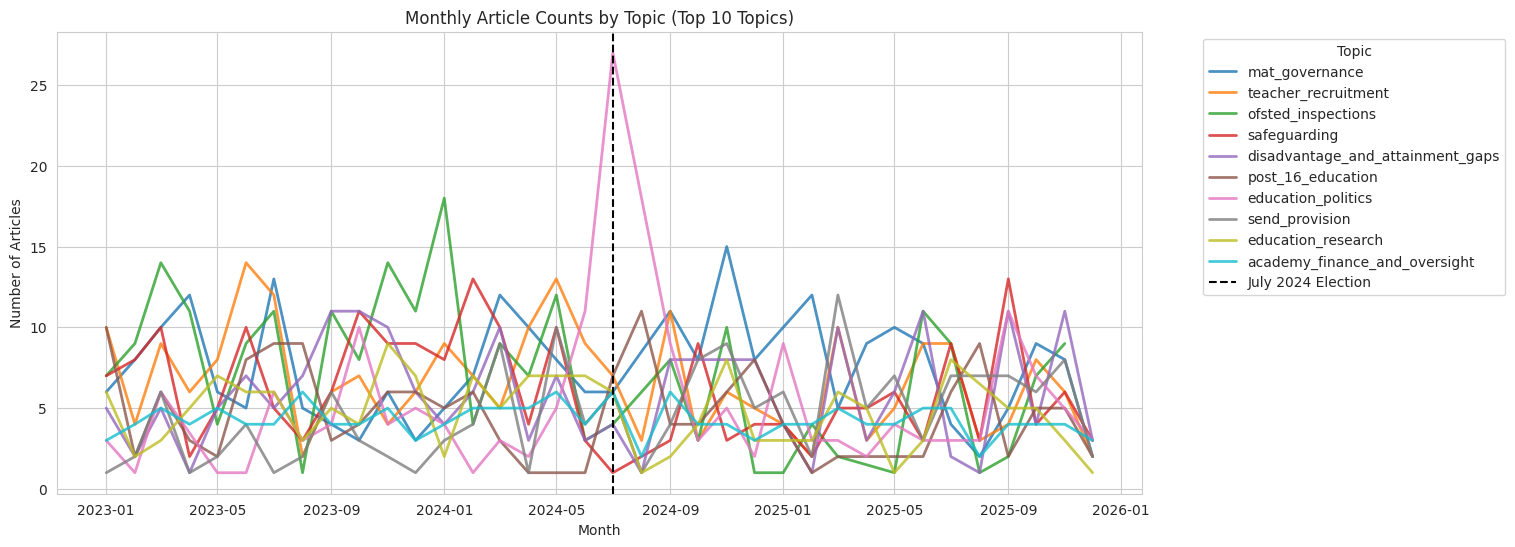

In [22]:
cutoff = pd.Timestamp("2024-07-01")

plt.figure(figsize=(14, 6))

for topic in top_n_topics:
    data = monthly_counts[
        monthly_counts["topic_name"] == topic
    ]
    plt.plot(
        data["year_month"],
        data["n_articles"],
        linewidth=2,
        alpha=0.8,
        label=topic
    )

plt.axvline(
    cutoff,
    color="black",
    linestyle="--",
    linewidth=1.5,
    label="July 2024 Election"
)

plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.title("Monthly Article Counts by Topic (Top 10 Topics)")
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    title="Topic"
)

save_fig("topic_attention_monthly_raw.png", tight=False)
plt.show()

## Topic Attention Over Time: Monthly Article Counts (Top 10 Topics)

This figure shows monthly article counts for the ten most frequently occurring education policy topics across the corpus between 2023 and 2025. Overall, the distribution of attention is highly volatile, with sharp month-to-month fluctuations across all topics. No single topic maintains consistent dominance over time; instead, peaks in coverage appear episodic and likely driven by specific events, announcements, or controversies.

Around the July 2024 election, there is no uniform or sustained shift across all topics. Instead, the period is characterised by continued volatility and short-lived spikes in attention, suggesting that the education policy agenda remains reactive rather than stable. This figure therefore provides important contextual background, illustrating the dynamic and event-driven nature of education policy coverage rather than evidencing a clear, system-wide agenda shift associated with the election.


### Add a three month rolling average: A three-month rolling average is used to smooth short-term volatility in monthly article counts while preserving underlying trends in topic attention.

In [23]:
monthly_counts_smoothed = (
    monthly_counts
    .sort_values("year_month")
    .assign(
        n_articles_smooth=lambda x: (
            x.groupby("topic_name")["n_articles"]
             .rolling(window=3, min_periods=1)
             .mean()
             .reset_index(level=0, drop=True)
        )
    )
)

Saved: topic_attention_rolling_3m.png


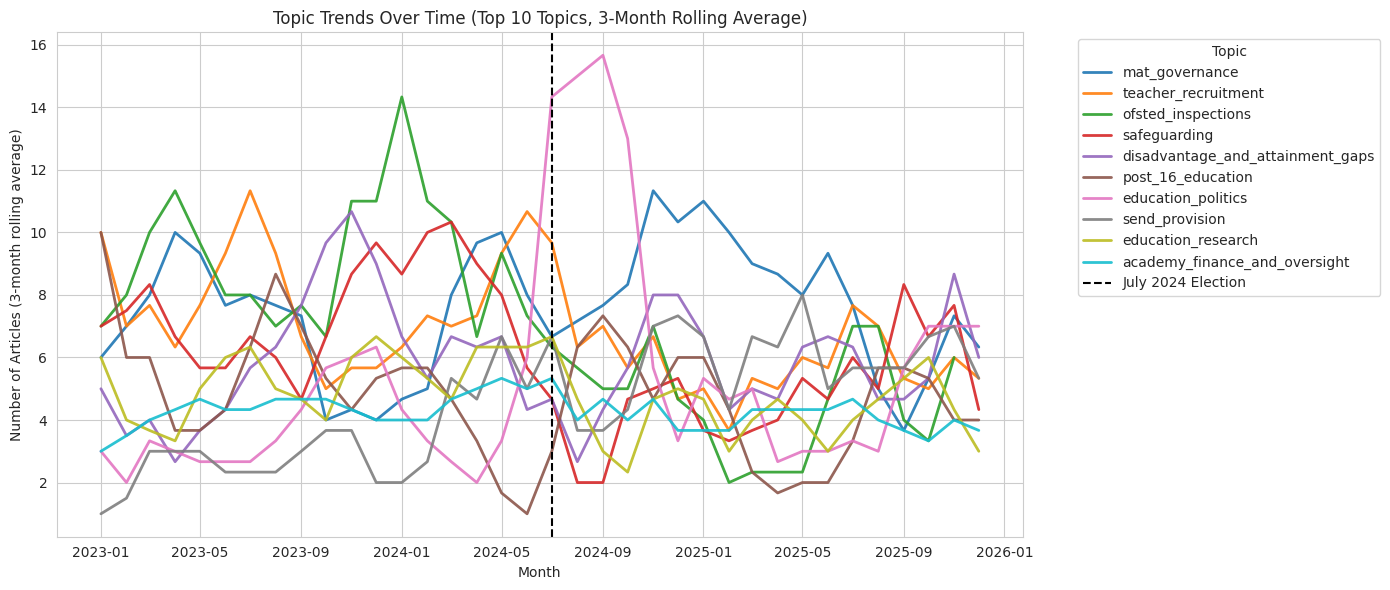

In [24]:
cutoff = pd.Timestamp("2024-07-01")

plt.figure(figsize=(14, 6))

for topic in top_n_topics:
    data = monthly_counts_smoothed[
        monthly_counts_smoothed["topic_name"] == topic
    ]
    plt.plot(
        data["year_month"],
        data["n_articles_smooth"],   # 👈 smoothed values
        linewidth=2,
        alpha=0.9,
        label=topic
    )

plt.axvline(
    cutoff,
    color="black",
    linestyle="--",
    linewidth=1.5,
    label="July 2024 Election"
)

plt.xlabel("Month")
plt.ylabel("Number of Articles (3-month rolling average)")
plt.title("Topic Trends Over Time (Top 10 Topics, 3-Month Rolling Average)")
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    title="Topic"
)
plt.tight_layout()
save_fig("topic_attention_rolling_3m.png")

plt.show()

## Topic Attention Over Time: 3-Month Rolling Average

When monthly article counts are smoothed using a three-month rolling average, the underlying patterns in topic attention become clearer. Although short-term volatility is reduced, the overall picture remains one of a dynamic and uneven agenda, with topics rising and falling in prominence rather than following sustained linear trends.

The smoothed series reinforces the conclusion that the July 2024 election does not correspond to a uniform or system-wide shift in attention across all topics. Instead, changes appear selective and topic-specific, with some areas showing gradual post-election reorientation while others remain broadly stable. This figure therefore complements the raw monthly counts by highlighting longer-term patterns without obscuring the fundamentally reactive nature of education policy coverage.


# Changes over time Ofsted and Accountability 

In [25]:
topics_of_interest = [
    "ofsted_inspections",
    "accountability_reform"
]

In [26]:
monthly_counts = (
    df[df["topic_name"].isin(topics_of_interest)]
    .groupby(["year_month", "topic_name"])
    .size()
    .reset_index(name="n_articles")
)

Saved: ofsted_vs_accountability_over_time.png


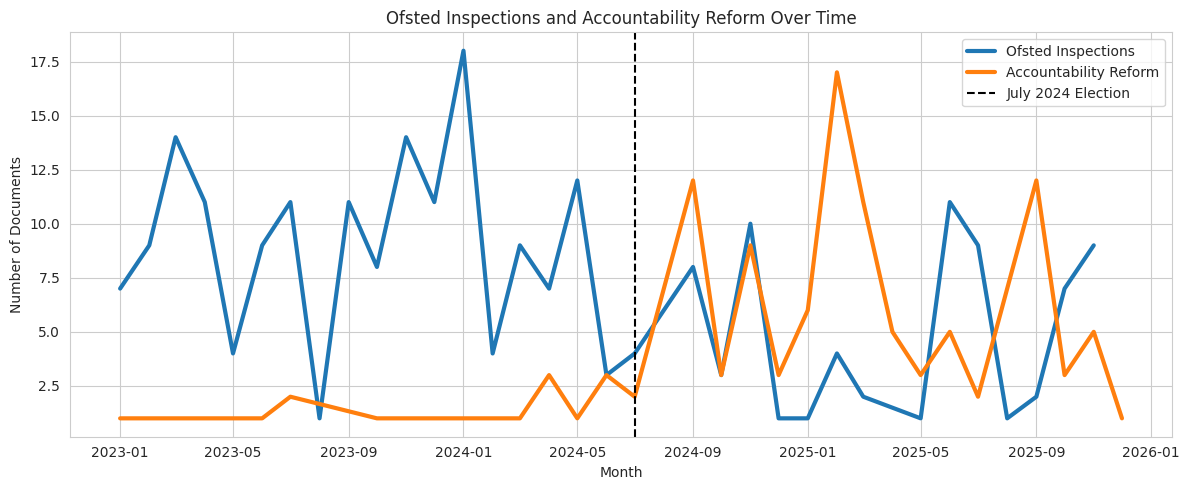

In [27]:
cutoff = pd.Timestamp("2024-07-01")

plt.figure(figsize=(12, 5))

for topic in topics_of_interest:
    data = monthly_counts[monthly_counts["topic_name"] == topic]
    plt.plot(
        data["year_month"],
        data["n_articles"],
        linewidth=3,
        label=topic.replace("_", " ").title()
    )

plt.axvline(
    cutoff,
    color="black",
    linestyle="--",
    linewidth=1.5,
    label="July 2024 Election"
)

plt.xlabel("Month")
plt.ylabel("Number of Documents")
plt.title("Ofsted Inspections and Accountability Reform Over Time")
plt.legend()
plt.tight_layout()

save_fig("ofsted_vs_accountability_over_time.png")
plt.show()

## Ofsted Inspections and Accountability Reform Over Time

Focusing more narrowly on Ofsted inspections and accountability reform reveals a clearer pattern of change over time. Prior to the July 2024 election, coverage of Ofsted inspections is relatively frequent, with repeated peaks and sustained attention across multiple months. In the post-election period, inspection-related coverage remains present but becomes less frequent and less sustained, with lower average monthly article counts.

By contrast, accountability reform shows very limited coverage prior to the election, appearing only sporadically at low levels. Following July 2024, attention to accountability reform increases noticeably, with several post-election months showing higher and more pronounced peaks in article counts. While coverage of both topics remains volatile and event-driven, the relative increase in accountability reform alongside a reduction in inspection-focused coverage suggests a shift in emphasis within accountability-related discourse, from routine inspection activity towards reform-oriented discussions in the post-election period.


In [28]:
topics_of_interest = [
    "ofsted_inspections",
    "accountability_reform"
]

df_two = df[df["topic_name"].isin(topics_of_interest)]


In [29]:
monthly_counts_org = (
    df_two
    .groupby(["source", "year_month", "topic_name"])
    .size()
    .reset_index(name="n_articles")
)


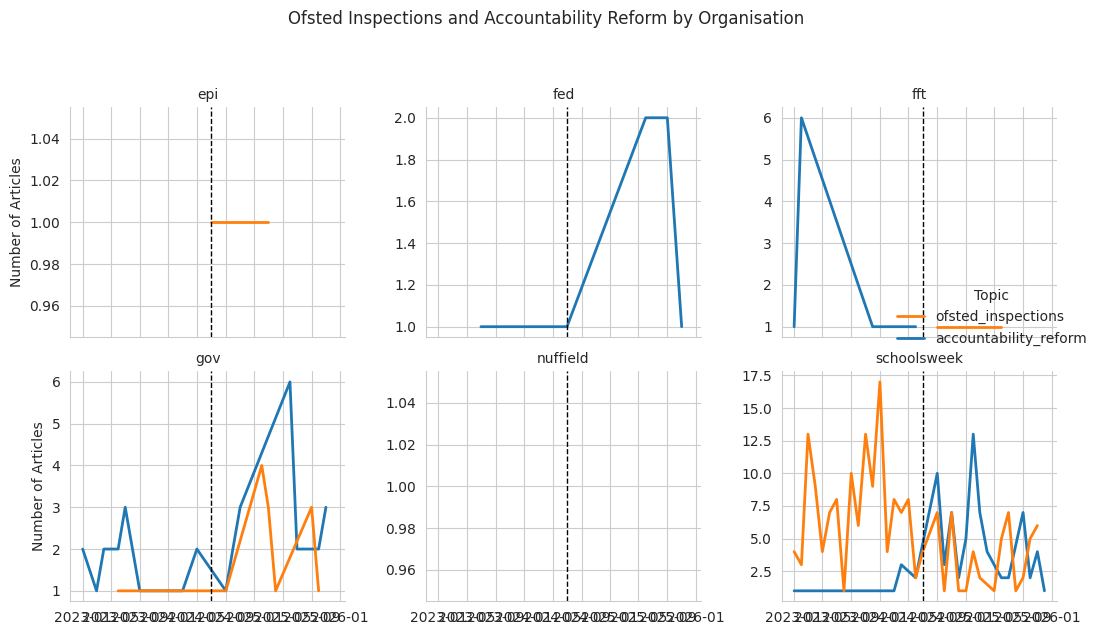

In [30]:
cutoff = pd.Timestamp("2024-07-01")

g = sns.FacetGrid(
    monthly_counts_org,
    col="source",
    col_wrap=3,          # adjust depending on number of orgs
    height=3,
    sharey=False         # important: different orgs have different volumes
)

g.map_dataframe(
    sns.lineplot,
    x="year_month",
    y="n_articles",
    hue="topic_name",
    linewidth=2
)

# add election line to each subplot
for ax in g.axes.flat:
    ax.axvline(
        cutoff,
        color="black",
        linestyle="--",
        linewidth=1
    )
    ax.set_xlabel("")

g.add_legend(title="Topic")
g.set_titles(col_template="{col_name}")
g.set_ylabels("Number of Articles")
g.fig.suptitle(
    "Ofsted Inspections and Accountability Reform by Organisation",
    y=1.05
)

plt.tight_layout()
plt.show()

### Interpretation: 
Taken together, the figure shows that the **aggregate post-election increase in accountability reform is not system-wide**.

Instead, the shift is driven primarily by:

- **Government sources**
- **Schools Week**

In contrast, **research-oriented organisations** (Education Policy Institute, FFT Education Datalab, and the Nuffield Foundation) show **little to no contribution** to this post-election shift in volume.

The **Foundation for Education Development (FED)** shows a **small but distinct post-election uptick**, which reinforces the broader reform signal but does not drive it at scale.

### What can be said with confidence

The post-election shift from **inspection-centred accountability** towards **reform-oriented accountability** is driven mainly by **government communications and sector-facing media**, rather than by research organisations.


# Rank change pre and post election 

In [31]:
topic_counts_by_period = (
    df
    .groupby(['period', 'topic_name'])
    .size()
    .reset_index(name='n_articles')
)

In [32]:
topic_counts_by_period['rank'] = (
    topic_counts_by_period
    .groupby('period')['n_articles']
    .rank(ascending=False, method='min')
)

In [33]:
rank_change = (
    topic_counts_by_period
    .pivot(index="topic_name", columns="period", values="rank")
    .rename(columns={
        "pre_election": "rank_pre",
        "post_election": "rank_post"
    })
)

rank_change = rank_change[["rank_pre", "rank_post"]]


In [34]:
rank_change['rank_change'] = (
    rank_change['rank_pre'] - rank_change['rank_post']
)

In [35]:
rank_change.sort_values('rank_change', ascending=False).head(30)

period,rank_pre,rank_post,rank_change
topic_name,,,
accountability_reform,30.0,4.0,26.0
ai_and_edtech,26.0,13.0,13.0
free_school_meals,24.0,14.0,10.0
send_provision,13.0,5.0,8.0
dfe_intervention,27.0,20.0,7.0
education_politics,12.0,6.0,6.0
child_and_family_support,29.0,25.0,4.0
mat_governance,4.0,1.0,3.0
disadvantage_and_attainment_gaps,5.0,2.0,3.0


In [36]:
top10_rank_changes = (
    rank_change
    .assign(abs_change=lambda x: x["rank_change"].abs())
    .sort_values("abs_change", ascending=False)
    .head(10)
    .drop(columns="abs_change")
)

In [37]:
top10_rank_changes["direction"] = np.where(
    top10_rank_changes["rank_change"] > 0,
    "Increased prominence",
    "Decreased prominence"
)

In [38]:
top10_rank_changes = top10_rank_changes.sort_values(
    "rank_change",
    ascending=False
)
top10_rank_changes

period,rank_pre,rank_post,rank_change,direction
topic_name,,,,
accountability_reform,30.0,4.0,26.0,Increased prominence
ai_and_edtech,26.0,13.0,13.0,Increased prominence
free_school_meals,24.0,14.0,10.0,Increased prominence
send_provision,13.0,5.0,8.0,Increased prominence
dfe_intervention,27.0,20.0,7.0,Increased prominence
education_politics,12.0,6.0,6.0,Increased prominence
pupil_absence,24.0,30.0,-6.0,Decreased prominence
ofsted_inspections,1.0,9.0,-8.0,Decreased prominence
teacher_strikes,6.0,27.0,-21.0,Decreased prominence


In [39]:
top_movers = (
    rank_change
    .assign(abs_change=lambda x: x["rank_change"].abs())
    .sort_values("abs_change", ascending=False)
    .head(8)
)

Saved: agenda_reordering_pre_post_election.png


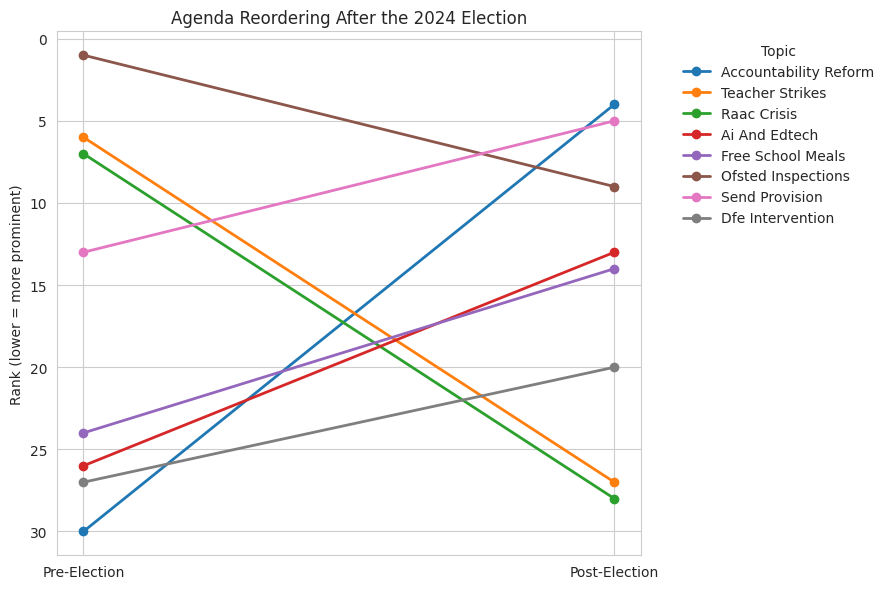

In [40]:
plt.figure(figsize=(9, 6))

for topic, row in top_movers.iterrows():
    plt.plot(
        [0, 1],
        [row["rank_pre"], row["rank_post"]],
        marker="o",
        linewidth=2,
        label=topic.replace("_", " ").title()
    )

plt.xticks([0, 1], ["Pre-Election", "Post-Election"])
plt.gca().invert_yaxis()
plt.ylabel("Rank (lower = more prominent)")
plt.title("Agenda Reordering After the 2024 Election")

plt.legend(
    title="Topic",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    frameon=False
)

plt.tight_layout()
save_fig("agenda_reordering_pre_post_election.png")
plt.show()

## Rank Change in Topic Prominence Pre- and Post-Election

This table shows the ten education policy topics that experienced the largest changes in relative prominence between the pre-election and post-election periods, measured by changes in rank based on article counts. Positive rank changes indicate topics that rose in relative importance after the election, while negative values indicate topics that declined.

### Topics Increasing in Prominence

Several topics show substantial upward movement in the post-election agenda. **Accountability reform** exhibits the largest increase, moving from a low pre-election rank (30) to a highly prominent position post-election (rank 4). This represents a major reordering of attention towards reform-oriented accountability discussions. Other notable risers include **AI and EdTech**, **free school meals**, and **SEND provision**, all of which move from relatively peripheral positions into the upper tier of the agenda. Together, these increases suggest growing attention to structural reform, system modernisation, and pupil support issues in the post-election period.

Moderate increases are also observed for **DfE intervention** and **education politics**, indicating a heightened focus on central government action and the political framing of education policy after the election.

### Topics Decreasing in Prominence

In contrast, several topics experience marked declines in relative prominence. **Teacher strikes** and the **RAAC crisis** show the largest downward shifts, each falling more than twenty ranks post-election. This pattern suggests a reduction in attention to acute or crisis-driven issues that were highly salient in the pre-election period. **Ofsted inspections** also decline substantially, moving from the top-ranked topic pre-election to a lower, though still visible, position post-election. Smaller declines are observed for **pupil absence**, indicating a relative deprioritisation rather than complete disappearance from the agenda.

### Overall Interpretation

Taken together, these rank changes indicate a clear reordering of the education policy agenda following the election. Post-election attention appears to shift away from crisis- and conflict-oriented topics towards longer-term reform, governance, and system development issues. Importantly, this analysis captures changes in *relative prominence* rather than absolute coverage and should therefore be interpreted alongside time-series trends in article counts.


# TOPIC FRAMING ACROSS ORGANISATIONS 

#### To examine how different organisations frame key education policy issues, TF-IDF was used to extract organisation-specific keywords for selected topics. This approach highlights vocabulary that is distinctive to each organisation’s coverage, allowing comparison of framing rather than volume of attention.

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def extract_org_framing_keywords(
    df,
    topic_name,
    text_col="text_clean",
    org_col="source",
    top_n_terms=15,
    max_features=1000,
    ngram_range=(1, 2)
):
    """
    Extract organisation-specific framing keywords for a given topic
    using TF-IDF.
    """

    # filter to topic
    topic_docs = df[df["topic_name"] == topic_name]

    # aggregate text by organisation
    org_texts = (
        topic_docs
        .groupby(org_col)[text_col]
        .apply(lambda x: " ".join(x))
    )

    # TF-IDF
    vectorizer = TfidfVectorizer(
        stop_words="english",
        max_features=max_features,
        ngram_range=ngram_range
    )

    tfidf = vectorizer.fit_transform(org_texts)
    terms = vectorizer.get_feature_names_out()

    # collect top terms per organisation
    keywords = {}

    for i, org in enumerate(org_texts.index):
        scores = tfidf[i].toarray().flatten()
        top_terms = (
            pd.Series(scores, index=terms)
            .sort_values(ascending=False)
            .head(top_n_terms)
        )
        keywords[org] = top_terms

    # return as tidy dataframe
    keywords_df = (
        pd.concat(keywords, axis=1)
        .fillna(0)
    )

    return keywords_df


In [42]:
topics_to_analyse = [
    "teacher_recruitment",
    "ofsted_inspections",
    "disadvantage_and_attainment_gaps"
]

framing_results = {}

for topic in topics_to_analyse:
    framing_results[topic] = extract_org_framing_keywords(
        df,
        topic_name=topic,
        top_n_terms=12
    )


In [43]:
framing_results["teacher_recruitment"]

,epi,fed,fft,gov,nuffield,schoolsweek
teachers,0.516722,0.182812,0.534203,0.480491,0.278074,0.343646
schools,0.313421,0.000000,0.000000,0.222837,0.000000,0.189777
pension,0.266019,0.000000,0.000000,0.000000,0.000000,0.000000
number,0.215100,0.000000,0.000000,0.000000,0.000000,0.000000
cent,0.191563,0.000000,0.000000,0.000000,0.000000,0.314046
secondary,0.158495,0.000000,0.000000,0.000000,0.000000,0.000000
secondary schools,0.145324,0.000000,0.000000,0.000000,0.000000,0.000000
pay,0.141761,0.000000,0.000000,0.000000,0.000000,0.000000
profession,0.118592,0.166193,0.000000,0.000000,0.000000,0.000000
teaching,0.110121,0.282528,0.145692,0.160164,0.254901,0.105217


## Organisational Framing of Teacher Recruitment

This table shows organisation-specific TF-IDF keywords associated with coverage of **teacher recruitment**, highlighting how different organisations frame the issue using distinctive language rather than frequency of mention. Higher scores indicate terms that are more characteristic of an organisation’s framing relative to others.

### Education Policy Institute (EPI)

EPI’s framing is strongly **workforce- and system-oriented**, emphasising *teachers*, *schools*, *pay*, *pensions*, *secondary schools*, and *applicants*. The presence of quantitative and structural terms such as *number*, *per cent*, and *years* suggests an analytical framing that focuses on workforce supply, retention, and demographic trends. Overall, EPI approaches teacher recruitment as a systemic labour market issue, grounded in data and long-term patterns rather than short-term policy interventions.

### Foundation for Education Development (FED)

FED’s framing centres on **professionalisation and institutional structures**. Distinctive terms such as *chartered*, *commission*, *college*, *professional development*, and *education* point to a normative and reform-oriented perspective, in which teacher recruitment is linked to professional status, standards, and career pathways. Compared to other organisations, FED places relatively less emphasis on immediate shortages and more on shaping the profession itself.

### FFT Education Datalab

FFT Education Datalab frames teacher recruitment through a **data-analytic and outcomes-based lens**. Keywords such as *outcomes*, *results*, *report*, *data*, *jobs*, and *levels* indicate a focus on empirical analysis and evidence generation. The emphasis is less on policy debate or professional identity and more on measuring recruitment-related patterns and their consequences using quantitative research outputs.

### UK Government (Gov / DfE)

Government framing foregrounds **policy action and system delivery**. Terms such as *government*, *training*, *support*, *new*, *year*, and *maths* suggest an implementation-oriented narrative focused on programmes, initiatives, and subject-specific interventions. This framing positions teacher recruitment as a problem to be addressed through targeted policy levers rather than structural reform or professional redefinition.

### Nuffield Foundation

The Nuffield Foundation’s framing is clearly **research- and workforce-focused**, with distinctive terms including *researchers*, *data*, *impact*, *workforce*, *quality*, and *teacher workforce*. This indicates an emphasis on funding, evidence generation, and longer-term research agendas rather than direct policy advocacy or operational solutions. Teacher recruitment is framed as a research problem with implications for workforce quality and system performance.

### Schools Week

Schools Week’s framing is notably **journalistic and reactive**, characterised by reporting-oriented terms such as *said*, alongside policy-facing terms like *DfE*, *recruitment*, *school*, and *year*. This reflects a news-driven approach that foregrounds statements, announcements, and official responses, situating teacher recruitment within ongoing political and administrative developments rather than abstract analysis or reform models.

### Cross-Organisational Comparison

Taken together, the TF-IDF results reveal clear differences in how teacher recruitment is framed across organisations. Research-focused bodies (EPI, FFT, Nuffield) emphasise data, workforce structure, and outcomes; reform-oriented organisations (FED) foreground professionalisation and institutional change; government sources emphasise delivery and intervention; and media coverage (Schools Week) focuses on immediacy, attribution, and official discourse. These differences illustrate how a shared policy issue is constructed through distinct organisational lenses rather than a single dominant narrative.


In [44]:
framing_results["ofsted_inspections"]

,epi,fft,gov,schoolsweek
schools,0.616234,0.509616,0.221705,0.249031
outstanding,0.377692,0.000000,0.000000,0.000000
inspected,0.258421,0.000000,0.000000,0.000000
good,0.218664,0.131514,0.000000,0.000000
outstanding schools,0.198785,0.000000,0.000000,0.000000
headline,0.194514,0.000000,0.000000,0.000000
schools inspected,0.178907,0.000000,0.000000,0.000000
currently,0.159028,0.000000,0.000000,0.000000
good outstanding,0.139150,0.000000,0.000000,0.000000
shows,0.139150,0.000000,0.000000,0.000000


## Organisational Framing of Ofsted Inspections

This table presents organisation-specific TF-IDF keywords associated with coverage of **Ofsted inspections**, highlighting how different organisations frame inspection-related issues using distinctive language rather than frequency of mention. Higher scores indicate terms that are more characteristic of an organisation’s framing relative to others.

### Education Policy Institute (EPI)

EPI’s framing of Ofsted inspections is strongly oriented towards **inspection outcomes and classification**. Distinctive terms such as *outstanding*, *good*, *inadequate*, and phrases like *schools inspected* and *outstanding schools* indicate an analytical focus on inspection judgements and their distribution across schools. The prominence of terms such as *figure*, *shows*, and *headline* suggests an evidence-led framing that treats inspection results as indicators of system performance rather than as procedural or political events.

### FFT Education Datalab

FFT Education Datalab frames Ofsted inspections through a **data-driven and evaluative lens**. Keywords including *inspection*, *inspectors*, *inspections*, *outcomes*, *data*, *primary*, and *inadequate* point to an emphasis on empirical analysis of inspection results and their implications. This framing aligns inspection activity with measurable outcomes and school-level characteristics, reinforcing FFT’s role as an analytical organisation focused on interpreting inspection data rather than debating inspection policy.

### UK Government (Gov / DfE)

Government framing foregrounds **institutional authority and policy responsibility**. Terms such as *children*, *education*, *work*, and *want* suggest a normative and policy-facing narrative in which inspections are linked to broader objectives around education quality and child outcomes. Compared to research-focused organisations, the government’s framing places less emphasis on inspection categories or data analysis and more on the role of inspection within a wider policy and accountability framework.

### Schools Week

Schools Week’s framing is distinctly **journalistic and watchdog-oriented**. High-scoring terms such as *Ofsted*, *said*, *watchdog*, *leaders*, and *added* reflect a reporting style centred on statements, reactions, and institutional scrutiny. This framing positions Ofsted inspections as news events, foregrounding authority figures, official responses, and accountability narratives rather than analytical interpretation of inspection outcomes.

### Cross-Organisational Comparison

Taken together, the TF-IDF results reveal clear differences in how Ofsted inspections are framed across organisations. Research-oriented organisations (EPI and FFT) emphasise inspection outcomes, classifications, and data-driven evaluation. Government coverage situates inspections within broader policy goals and responsibilities, while media coverage (Schools Week) frames inspections as matters of public accountability, authority, and ongoing institutional scrutiny. These differences demonstrate that Ofsted inspections function not as a single shared policy object, but as a site of multiple, organisation-specific framings.


In [45]:
framing_results["disadvantage_and_attainment_gaps"]

,epi,fft,gov,nuffield,schoolsweek
pupils,0.480335,0.576611,0.198328,0.147456,0.414200
attainment,0.324749,0.141025,0.000000,0.000000,0.000000
school,0.258379,0.194410,0.000000,0.000000,0.321453
speak,0.188708,0.000000,0.000000,0.000000,0.000000
eal,0.182371,0.000000,0.000000,0.000000,0.000000
speak eal,0.171987,0.000000,0.000000,0.000000,0.000000
send,0.151976,0.000000,0.000000,0.000000,0.000000
schools,0.146832,0.306945,0.272702,0.000000,0.340775
groups,0.146688,0.000000,0.000000,0.000000,0.000000
ethnic,0.139178,0.000000,0.000000,0.000000,0.000000


## Organisational Framing of Disadvantage and Attainment Gaps

This analysis examines how different organisations frame **disadvantage and attainment gaps** through distinctive language, using TF-IDF to identify terms that are characteristic of each organisation’s coverage rather than simply frequent. The results show that disadvantage is not treated as a single, shared policy problem, but is constructed in markedly different ways across research, government, and media sources.

### Education Policy Institute (EPI)

EPI frames disadvantage primarily as a **structural and demographic phenomenon**. High-weight terms such as *pupils*, *attainment*, *EAL*, *SEND*, *ethnic*, *groups*, and *provision* indicate a focus on how disadvantage is patterned across pupil populations. The prominence of language-related terms (*speak*, *EAL*, *pupils speak*) suggests particular attention to linguistic disadvantage as a mechanism underpinning attainment gaps. Overall, EPI constructs disadvantage as a systemic condition rooted in pupil characteristics and institutional contexts, requiring analytical understanding rather than short-term intervention.

### FFT Education Datalab

FFT Education Datalab frames disadvantage through a **measurement-driven and empirical lens**. Distinctive terms such as *data*, *percentage*, *year*, *pupil*, and *disadvantaged pupils* point to a strong emphasis on quantification, tracking, and comparison over time. Disadvantage is treated as something that can be observed, monitored, and benchmarked across schools and cohorts. This framing aligns with FFT’s analytical role and positions disadvantage as a measurable gap rather than a primarily political or moral issue.

### UK Government (Gov / DfE)

Government framing constructs disadvantage as a **problem of delivery and intervention**. The dominance of terms such as *tutoring*, *providers*, *sessions*, *programme*, *curriculum*, *exam*, and *quality* indicates a focus on specific policy instruments designed to mitigate attainment gaps. In this framing, disadvantage is addressed through targeted initiatives and system levers, with less emphasis on underlying structural or demographic drivers. The language reflects an action-oriented approach centred on implementation rather than diagnosis.

### Nuffield Foundation

The Nuffield Foundation frames disadvantage in **developmental and longitudinal terms**. High-scoring terms such as *language*, *children*, *early*, *support*, *intervention*, *development*, *impact*, and *time* point to an emphasis on early childhood, developmental trajectories, and long-term outcomes. Disadvantage is constructed as something that accumulates over time and can be mitigated through early, evidence-informed intervention. This framing differs from both government and media narratives by privileging temporal depth and developmental processes.

### Schools Week

Schools Week frames disadvantage through a **journalistic and political lens**. Terms such as *schools*, *pupils*, *said*, *cent*, *government*, and *children* reflect reporting practices that foreground official statements, headline statistics, and political accountability. Disadvantage appears as a matter of public debate and policy contention, rather than as a concept subjected to sustained analytical or developmental framing.

### Analytical Implications

Taken together, these framings reveal that while “disadvantage” is a shared label, it carries **fundamentally different meanings** across organisations. Research organisations emphasise structure, measurement, and long-term processes; government sources focus on programmes and delivery; and media coverage foregrounds immediacy and political responsibility. This divergence helps explain why policy debates around disadvantage often lack coherence: actors are not merely proposing different solutions, but are operating with different underlying conceptions of what disadvantage is and how it should be addressed.


# Wordcloud 

In [53]:
topic_name = "disadvantage_and_attainment_gaps"

topic_text = " ".join(
    df.loc[df["topic_name"] == topic_name, "text_clean"]
)

In [66]:
from wordcloud import STOPWORDS

extra_stopwords = {
    # modal / vague verbs
    "will", "may", "might", "can", "could", "should",
    "show", "shows", "showed",
    "use", "used", "using",
    "take", "takes", "taken",
    "make", "made", "making",
    "look", "looking",   
    "cent", "per", "percent", 
    "percentage",
    "s", "within"

    # numbers / quantification
    "per", "percent", "percentage",
    "number", "numbers",
    "score", "scores",
    "rate", "rates",
    "level", "levels",
    "gap", "gaps",
    "difference", "differences",

    # time / sequencing
    "time", "year", "years",
    "week", "weeks",
    "last", "next", "first",
    "three", "many", "least",

    # generic research / reporting
    "data", "result", "results",
    "report", "reports",
    "analysis",
    "subject", "subjects",
    "cohort",
    "average",
    "national",
    "local",
    "area",
    "place",

    # education boilerplate
    "school", "schools",
    "pupil", "pupils",
    "student", "students",
    "child", "children",
    "teacher", "teachers",
    "staff",
    "primary", "secondary",
    "gcse", "ap",

    # policy / institutional noise
    "government", "dfe",
    "trust", "system",
    "funded", "funding",
    "case",

    # generic verbs / fillers
    "need", "needs",
    "well", "high", "higher", "lower",
    "less", "new",
    "now",
    "see", "seen"
}


custom_stopwords = STOPWORDS.union({
    "said", "say", "says",
    "school", "schools",
    "pupil", "pupils",
    "child", "children",
    "year", "years",
    "education", "educational",
    "teacher", "teachers"
}).union(extra_stopwords)

Saved: wordcloud.png


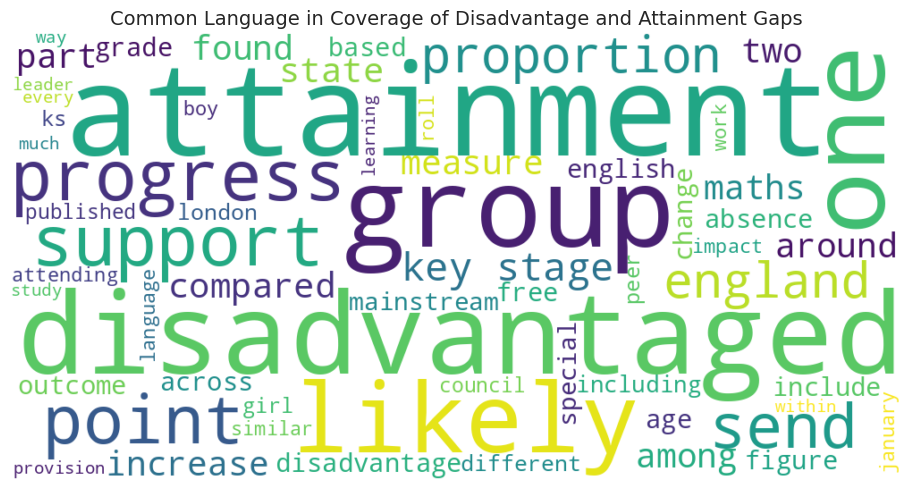

In [68]:
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    max_words=60,
    stopwords=custom_stopwords,
    prefer_horizontal=0.9
).generate(topic_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(
    "Common Language in Coverage of Disadvantage and Attainment Gaps",
    fontsize=14
)

save_fig("wordcloud.png")
plt.show()

# figure check 

In [69]:
print("Exported figures:")
for f in sorted(FIG_DIR.glob("*.png")):
    print(" -", f.name)


Exported figures:
 - agenda_reordering_pre_post_election.png
 - ofsted_vs_accountability_over_time.png
 - top_10_topics.png
 - topic_attention_monthly_raw.png
 - topic_attention_rolling_3m.png
 - topic_distribution_full_corpus.png
 - wordcloud.png
